## Classical NLP - With NLTK/SpaCy

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.
The study of natural language processing has been around for more than 50 years and grew out of the field of linguistics with the rise of computers. 

As machine learning practitioners interested in working with text data, we are concerned with the tools and methods from the field of Natural Language Processing.



Text is an extremely rich source of information. Each minute, people send hundreds of millions of new emails and text messages. There’s a veritable mountain of text data waiting to be mined for insights. But data scientists who want to glean meaning from all of that text data face a challenge: it is difficult to analyze and process because it exists in **unstructured form**.

In this tutorial, we’ll take a look at how we can transform all of that unstructured text data into something more useful for analysis and natural language processing, using the helpful Python package spaCy [(documentation)](https://spacy.io/), NLTK [(docs)](https://www.nltk.org/) and scikit learn.

Once we’ve done this, we’ll be able to derive meaningful patterns and themes from text data. This is useful in a wide variety of data science applications: 
* spam filtering
* support tickets
* social media analysis
* contextual advertising
* reviewing customer feedback
* and more.

### Text tokenization

Tokenization is the process of breaking text into pieces, called tokens, and ignoring characters like punctuation marks (,. “ ‘) and spaces. spaCy‘s tokenizer takes input in form of unicode text and outputs a sequence of token objects:

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/idodavid/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/idodavid/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/idodavid/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

text_tokens = nltk.word_tokenize(text)
text_tokens

['When',
 'learning',
 'data',
 'science',
 ',',
 'you',
 'should',
 "n't",
 'get',
 'discouraged',
 '!',
 'Challenges',
 'and',
 'setbacks',
 'are',
 "n't",
 'failures',
 ',',
 'they',
 "'re",
 'just',
 'part',
 'of',
 'the',
 'journey',
 '.',
 'You',
 "'ve",
 'got',
 'this',
 '!']

### Cleaning Text Data: Removing Stopwords


Most text data that we work with is going to contain a lot of words that aren’t actually useful to us. These words, called stopwords, are useful in human speech, but they don’t have much to contribute to data analysis. Removing stopwords helps us eliminate noise and distraction from our text data, and also speeds up the time analysis takes (since there are fewer words to process).

Let’s take a look at the stopwords spaCy includes by default:

In [3]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

**Removing Stopwords:**

In [4]:
[t for t in text_tokens if t in stopwords]

['you', 'should', 'and', 'are', 'they', 'just', 'of', 'the', 'this']

### Lexicon Normalization

In NLP, a lexicon is the set of words composing all known words. We will usually keep it as small as possible, but this changes depending on the problam we are trying to solve. One of the methods to keep a lexicon small is to normalize it using stemming/lemmatization, both ways of processing words that reduces them to their roots.

while words like connect, connection, connecting, connected, etc. aren’t exactly the same, they all have the same essential meaning: connect. The differences in spelling have grammatical functions in spoken language, but for machine processing, those differences can be confusing, so we need a way to change all the words that are forms of the word connect into the word connect itself.

In [5]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
ps = PorterStemmer()
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


### Part of Speech (POS) Tagging

A word’s part of speech defines its function within a sentence. A noun, for example, identifies an object. An adjective describes an object. A verb describes action. Identifying and tagging each word’s part of speech in the context of a sentence is called Part-of-Speech Tagging, or POS Tagging.

In [7]:
from nltk import pos_tag

In [8]:
text ="learn about natural language processing is easy and fun"
tokens =  nltk.word_tokenize(text)
tokens_tag = pos_tag(tokens)
for token, token_tag in zip(tokens, tokens_tag):
    print(token, token_tag)

learn ('learn', 'NN')
about ('about', 'IN')
natural ('natural', 'JJ')
language ('language', 'NN')
processing ('processing', 'NN')
is ('is', 'VBZ')
easy ('easy', 'JJ')
and ('and', 'CC')
fun ('fun', 'NN')


### More NLP tools

* Entity Detection - Entity detection, also called entity recognition, is a more advanced form of language processing that identifies important elements like places, people, organizations, and languages within an input string of text. This is really helpful for quickly extracting information from text, since you can quickly pick out important topics or indentify key sections of text.
* Dependency Parsing - Depenency parsing is a language processing technique that allows us to better determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other:
![alt](https://www.dataquest.io/wp-content/uploads/2019/04/text-expressions-python-chart-1.png)
* Word Vector Representation - A word vector is a numeric representation of a word that commuicates its relationship to other words, Also known as embedding vector

## The Bag of words model

The Bag of Words (BoW) model is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).

Let’s recall the three types of movie reviews we saw earlier:

* Review 1: This movie is very scary and long
* Review 2: This movie is not scary and is slow
* Review 3: This movie is spooky and good

We will first build a vocabulary from all the unique words in the above three reviews. The vocabulary consists of these 11 words: ‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’.

We can now take each of these words and mark their occurrence in the three movie reviews above with 1s and 0s. This will give us 3 vectors for 3 reviews:



![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/BoWBag-of-Words-model-2.png)

Drawbacks of using a Bag-of-Words (BoW) Model:
    
In the above example, we can have vectors of length 11. However, we start facing issues when we come across new sentences:

* Out of Vocabulary words (OOV) - If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too.
* Sparsity - the vectors contain many 0s, thereby resulting in a sparse matrix 
* We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text

## Term Frequency and Inverse Document Frequency (TF-IDF)


Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
* Term frequency - The number of times a word appeared in the text
* Inverse document frequency - A measure of how unique is a given word 

### Term Frequency (TF)

The number of times the token “t” appears in the document “d”:

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/tf.jpg)

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/TF-matrix-1.png)

### Inverse Document Frequency (IDF)


IDF is a measure of how important a term is. We need the IDF value because computing just the TF alone is not sufficient to understand the importance of words:

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/idf.jpg)

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/IDF-matrix.png)

# Text classification

In [9]:
import pandas as pd

In [14]:
bad = pd.read_csv('data/bad_tweets.txt', names = ['id','tweet'], sep='\t')
good = pd.read_csv('data/good_tweets.txt', names = ['id','tweet'], sep='\t')

In [15]:
bad.shape, good.shape

((3490, 2), (3522, 2))

In [16]:
bad.head()

,id,tweet
0,100068216876965888,Social Media - Impact of Social Media on Small...
1,100523164500631552,Local Business Blogging - What to Blog About h...
2,100991945391878144,13 Hot Facebook Marketing Tips From the Top Pr...
3,101021386058903553,"Short of blog ideas? ""Local Business Blogging ..."
4,101417008050094080,Eleven Books That Will Rock Your World http://...


## Data exploration

In [17]:
from pandas import * 
import cufflinks as cf; cf.go_offline()

In [18]:
set_option('display.max_colwidth',200)

In [19]:
good['cls'] = 1
good.sample(5)

,id,tweet,cls
2601,411902031511556096,@felyn Cute! I want to sew coffee sleeves but haven't yet. I also love your nail polish there!,1
2455,409348740068016128,Salamat @Bamboomusiclive! :) http://t.co/WSyf8mdUTv,1
1597,396032546422923264,"@lioneris Take it back, cause I don't want that Donnie girl card lol! Gladly hands over my Jon girl card ;) oldie was sweet in Pitts though!",1
3506,66221165462556672,RT @g4tv: First screenshot of Assassin's Creed: Revelations released. Ezio is back. http://bit.ly/lt7Cqx,1
1510,395225341306085376,@SarahMayhem @GypsyLullaby7 @lilbrowngrrl I'm so excited!!! And I scored @JonsBoricuagal her VIP too!!!,1


In [20]:
bad['cls'] = 0
bad.sample(5)

,id,tweet,cls
3365,469145445302681600,Celebrate that wondrous mom and baby bond with the Pampers #ThanksBaby campaign and win! Ends 5/24 #giveaway #win http://t.co/gQ6A5nR91L,0
2759,467461262066974721,Celebrate that wondrous mom and baby bond with the Pampers #ThanksBaby campaign and win! Ends 5/24 #giveaway #win http://t.co/gQ6A5nR91L,0
2344,428663906912186368,RT @Microsoft: .@Bing searches related to Sunday’s game: Do you live in a Seahawks or Broncos state? http://t.co/JCWqR1lD9g http://t.co/cpZ…,0
2557,440442252482330624,RT @CarverJohns: STUDY: Cannabis Mitigates Opiate Withdrawal Symptoms http://t.co/pmAYeWvIY5,0
1404,285141200124669953,Otterbox Defender Series Hybrid Case Holster for iPhone 4 4S - Retail Packaging - White/Gunmetal Grey -,0


In [21]:
df = good.append(bad, ignore_index = True)
df.cls.value_counts()

1    3522
0    3490
Name: cls, dtype: int64

## Content based model

In [22]:
!pip install ttp

In [23]:
!pip install emoji

In [24]:
import string
import emoji
import re as regex

In [25]:
specialChars = ''.join([",", ":", "\"", "=", "&", ";", "%", "$","@", "%", "^", "*", "(", ")", "{", "}",'–','“', '”'
                      "[", "]", "|", "/", "\\", ">", "<", "-","!", "?", ".", "'","--", "---", "#", '‘', '’', '…'])  
space_chars = ['.',',',';', '&', '?','!']
def remove_by_regex(tweets, regexp):
    return tweets.replace(regexp, "")

def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"http\S+"))

def remove_special_chars(tweets): 
    return tweets.apply(lambda tweet: ''.join([c for c in tweet if c not in specialChars]))

def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@[^\s]+[\s]?"))

def remove_numbers(tweets):
    return remove_by_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))

def remove_emojis(tweets):
    return tweets.apply(lambda tweet: ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI))

def add_spaces(tweets):
    def add_spaces_int(tweet):
        for char in space_chars:
            tweet = tweet.replace(char, char + ' ')
        return tweet
    return tweets.apply(lambda tweet: add_spaces_int(tweet))

def leave_language_only(tweets):
    for f in [remove_urls, remove_emojis, add_spaces, remove_numbers, remove_usernames, remove_special_chars]:
        tweets = f(tweets)
    return tweets

In [26]:
df['pureTextTweet'] = leave_language_only(df.tweet.str.lower())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7012 non-null   int64 
 1   tweet          7012 non-null   object
 2   cls            7012 non-null   int64 
 3   pureTextTweet  7012 non-null   object
dtypes: int64(2), object(2)
memory usage: 219.2+ KB


In [27]:
df[['tweet','pureTextTweet']].sample()

,tweet,pureTextTweet
4341,ICP Review Gangnam Style Video: Psy Is the Asian Andy Dick! - http://t.co/LjKRkALW,icp review gangnam style video psy is the asian andy dick


In [28]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
nltk.word_tokenize(df.pureTextTweet.iloc[0])

['what',
 'a',
 'great',
 'tip',
 'ali',
 'no',
 'more',
 'leaving',
 'things',
 'behind',
 'and',
 'having',
 'to',
 'call',
 'the',
 'hotel',
 'in',
 'a',
 'panic']

In [30]:
all_words = [word for tweet in df.pureTextTweet for word in nltk.word_tokenize(tweet) if word.lower() not in stopwords] # Words without stop words
words_df = DataFrame(data = all_words, columns = ['word']).word.value_counts().reset_index()
words_df.columns = ['word','wordCount']
words_df['wordImportance'] = len(words_df) / words_df.wordCount / words_df.wordCount.max()
words_df.head()

,word,wordCount,wordImportance
0,rt,1338,0.007189
1,win,507,0.018972
2,giveaway,452,0.021281
3,enter,299,0.032170
4,im,279,0.034476


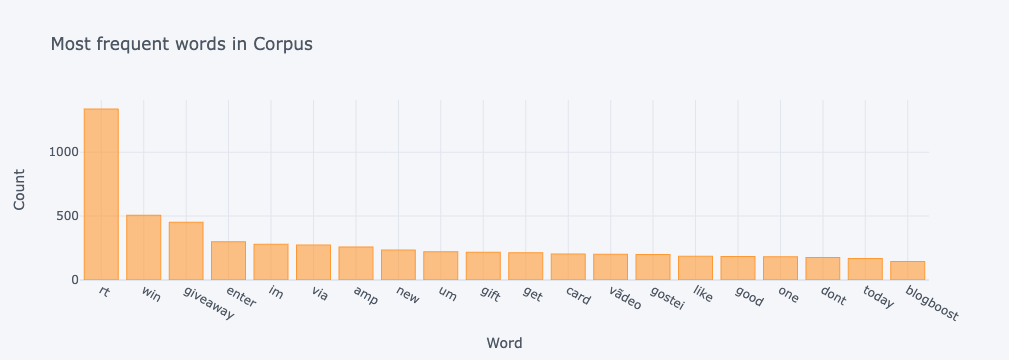

In [31]:
words_df.set_index('word').wordCount.head(20).iplot(kind = 'bar', title = 'Most frequent words in Corpus', yTitle = 'Count', xTitle = 'Word')

In [32]:
print("Total of {} words, {} unique words".format(len(all_words), len(words_df)))

Total of 51154 words, 12870 unique words


to reduce the corpus size more, we probably don't care about words that appear to little. Let's drop any word which have under 5 appearnces:

In [33]:
print ("Using words with 5 or more appearnces will reduce the corpus size to: {}".format(sum(words_df.wordCount >= 5)))

Using words with 5 or more appearnces will reduce the corpus size to: 2030


In [34]:
words_df = words_df[words_df.wordCount >= 5]

### Bag of words (One-hot-encoding)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
clean_vocab = set(words_df.word)
count_vect = CountVectorizer(vocabulary = clean_vocab, tokenizer=nltk.word_tokenize)
clean_bow_counts = count_vect.fit_transform(df.pureTextTweet)
clean_bow_counts.shape

(7012, 2030)

In [37]:
df.iloc[1].pureTextTweet

'thk you including my post social mediaimpact of social media on small business  in ideas for a digital wrld'

In [38]:
print(clean_bow_counts[1])

  (0, 236)	1
  (0, 470)	1
  (0, 851)	1
  (0, 866)	1
  (0, 1083)	1
  (0, 1326)	1
  (0, 1563)	1
  (0, 1572)	2


In [39]:
rev_dict = {v:k for k,v in count_vect.vocabulary_.items()}
print(rev_dict[236])
print(rev_dict[470])
print(rev_dict[851])
print(rev_dict[866])

business
digital
ideas
including


In [40]:
clean_bow_counts.sum()

34842

In [41]:
tf_idf_vectorizer = TfidfVectorizer(vocabulary = clean_vocab)
bow_tfidf = tf_idf_vectorizer.fit_transform(df.pureTextTweet)
bow_tfidf.shape

(7012, 2030)

In [42]:
bow_tfidf.sum()

13836.301529255948

## Classification

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, clean_bow_counts, y = df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

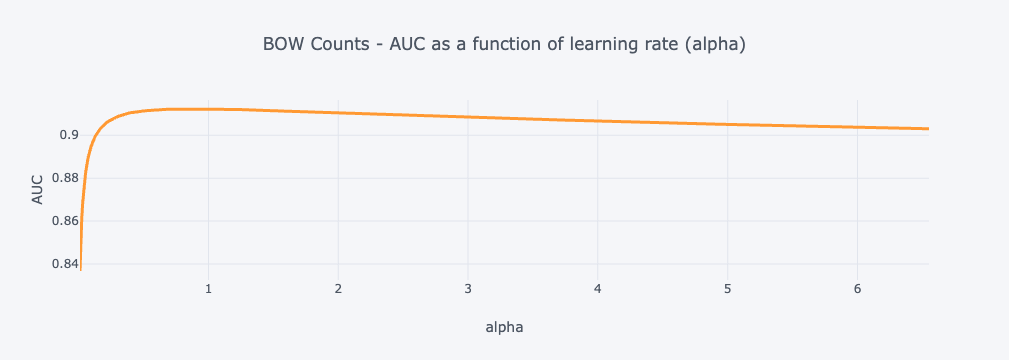

In [46]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [47]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

0.9102981779915218 0.9121847770883589


### Optimal Model

Let's use the optimal model regularization parameter and train a model on the **entire dataset**:

In [48]:
model = LogisticRegression(penalty='l2', C=opt_alpha)
model.fit(clean_bow_counts, df.cls)

LogisticRegression(C=0.9102981779915218)

In [49]:
df['predicted_class'] = model.predict(clean_bow_counts)
df[['class_0_prob','class_1_prob']] = model.predict_proba(clean_bow_counts)
df['prediction_certainty'] = df.apply(lambda row: row.class_0_prob if row.predicted_class == 0 else row.class_1_prob, axis=1)

In [50]:
accuracy_score(df.predicted_class, df.cls) # Training accuracy, for sanity only

0.9298345693097547

### Feature importance

In [51]:
weights = model.coef_.flatten()
words = [rev_dict[i] for i in range(len(weights))]
feature_weights = DataFrame({'word': words, 'weight': weights, 'absW': abs(weights)})
feature_weights.sort_values(by = 'absW', ascending = False, inplace = True)
feature_weights.head(5)

,word,weight,absW
724,giveaway,-3.126004,3.126004
1862,via,-2.341556,2.341556
181,blogboost,-2.315541,2.315541
774,haha,2.046584,2.046584
1382,quote,-1.991966,1.991966


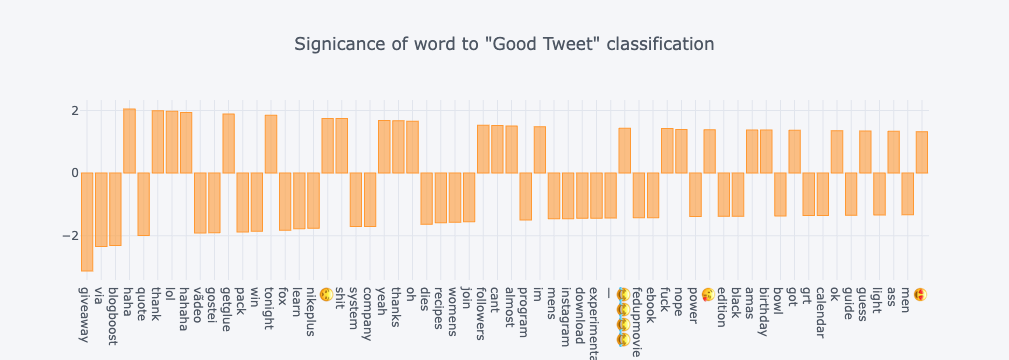

In [52]:
feature_weights.set_index('word').weight.head(60).iplot(kind = 'bar', title = 'Signicance of word to "Good Tweet" classification', hline=(0,0))


So we see that giveaway, via and blogboost are all highly indicative of a bot generated tweet, while haha is the most signifcant indication of a good tweet. 

<span style='background :yellow' > Class discussion: Suggests methods to verify that the results presented are indeed correct and there's no bug in the process of extraction feature importance</span>

In [53]:
df[df.tweet.apply(lambda x: 'haha' in x)].cls.value_counts()

1    79
Name: cls, dtype: int64

## Improving the initial model

To understand to imidiate steps to improve the model, let's look at the most significant errors, i.e., all the examples on which the model was very confident at the wrong class.

In [54]:
df['is_pred_error'] = df.cls != df.predicted_class

In [55]:
df[df.is_pred_error].sort_values(by='prediction_certainty', ascending=False).head(10)

,id,tweet,cls,pureTextTweet,predicted_class,class_0_prob,class_1_prob,prediction_certainty,is_pred_error
3766,154434078588940288,Winter has arrived in South Florida and I'm not liking it!Temps to go down to 30's tonight.Hope farmers able to harvest strawberries in time,0,winter has arrived in south florida and im not liking it temps to go down tos tonight hope farmers able to harvest strawberries in time,1,0.018740,0.981260,0.981260,True
12,123977435187380224,Become a Better Blogger | 5 Blogging Tips - Internet Marketing for Small Business Port St. Lucie http://t.co/wVQksMDo #blogboost #tlcclub,1,become a better blogger blogging tips internet marketing for small business port st lucie blogboost tlcclub,0,0.980979,0.019021,0.980979,True
10,123031911647035392,New: Viral Marketing – 7 Avenues of Distribution http://t.co/aDS0lXpi #blogboost #tlcclub,1,new viral marketing avenues of distribution blogboost tlcclub,0,0.964973,0.035027,0.964973,True
3785,158349659075649536,"http://t.co/MDjarFJc Perhaps I'm not stretching my mind far enough, but can't think of any one human who has a universal appeal because...",0,perhaps im not stretching my mind far enough but cant think of any one human who has a universal appeal because,1,0.039015,0.960985,0.960985,True
965,299941819742035968,Just an insane lego contraption: http://t.co/WdHJHZGC via @youtube,1,just an insane lego contraption via,0,0.949431,0.050569,0.949431,True
6149,457009180650381313,I just joined #naturebox and can't wait to start snacking. Get $10 off these awesome snacks too: http://t.co/V3BLDmHKYg by @NatureBox,0,i just joined naturebox and cant wait to start snacking get off these awesome snacks too by,1,0.051379,0.948621,0.948621,True
13,124916408063754240,More Customer Service tips and strategies in my 7 day e-course http://t.co/eCtk1qyP,1,more customer service tips and strategies in my day ecourse,0,0.946557,0.053443,0.946557,True
6188,462646619478196224,"RT @ArielRebel: Ok so we're gonna talk about porn instead. If this photo get 200RTs, ill tweet another NEW one that you haven't see! http:/…",0,rt ok so were gonna talk about porn instead if this photo getrts ill tweet another new one that you havent see,1,0.066266,0.933734,0.933734,True
5507,294785642804699136,Extraordinary Life I really didn't know what I even wanted anymore - what I needed was Kristen and her Go,0,extraordinary life i really didnt know what i even wanted anymore what i needed was kristen and her go,1,0.073918,0.926082,0.926082,True
5766,4027156720,Astonished to see that some people still just want traffic and they have no idea about conversion.,0,astonished to see that some people still just want traffic and they have no idea about conversion,1,0.075346,0.924654,0.924654,True


We can see some patterns:
* What makes good/bad is not clear, and sometimes seems erroneous
* Bad tweets often contain dollars, hashtags, @s and links - are those captured in the vocabulary we've created? * 

<span style='background :yellow' > Class discussion: Suggests methods to verify that the characters discussed above are in the corpus and are available for the classifier</span>

In [56]:
for c in ['@', '#', '$','http']: 
    for token in clean_vocab:
        if c in token:
            print(token, c)

<span style='background :yellow' > Class discussion: Suggests methods to include the missing information to the classifier</span>

In [57]:
nltk.word_tokenize("I just joined #naturebox and can't wait to start snacking. Get $10 off these awesome snacks too: http://t.co/V3BLDmHKYg by @NatureBox	")

['I',
 'just',
 'joined',
 '#',
 'naturebox',
 'and',
 'ca',
 "n't",
 'wait',
 'to',
 'start',
 'snacking',
 '.',
 'Get',
 '$',
 '10',
 'off',
 'these',
 'awesome',
 'snacks',
 'too',
 ':',
 'http',
 ':',
 '//t.co/V3BLDmHKYg',
 'by',
 '@',
 'NatureBox']

We have several options:
* Working on the original text without "cleaning it", or doing a better clean up job to not clean relevant information
* Add some ad-hoc features to the the bag-of-words vector

## Working on the original text

In [58]:
df['original_lower_cased_tweet'] = df.tweet.str.lower()
all_words = [word for tweet in df.original_lower_cased_tweet for word in nltk.word_tokenize(tweet) if word not in stopwords] # Words without stop words
words_df = DataFrame(data = all_words, columns = ['word']).word.value_counts().reset_index()
words_df.columns = ['word','wordCount']
words_df['wordImportance'] = len(words_df) / words_df.wordCount / words_df.wordCount.max()
words_df.head()

,word,wordCount,wordImportance
0,:,6015,0.000499
1,@,5005,0.000600
2,http,3765,0.000797
3,!,2964,0.001013
4,#,2670,0.001124


In [59]:
print("Total of {} words, {} unique words".format(len(all_words), len(words_df)))
print ("Using words with 5 or more appearnces will reduce the corpus size to: {}".format(sum(words_df.wordCount >= 5)))

Total of 93949 words, 18057 unique words
Using words with 5 or more appearnces will reduce the corpus size to: 2420


In [60]:
vocab = set(words_df[words_df.wordCount >= 5].word)
count_vect = CountVectorizer(vocabulary = vocab, tokenizer=nltk.word_tokenize)
bow_counts = count_vect.fit_transform(df.original_lower_cased_tweet)
bow_counts.shape

(7012, 2420)

In [61]:
df.iloc[1].original_lower_cased_tweet

'@mprasanth thk you 4 including my post social media-impact of social media on small business http://t.co/kvhd52x in ideas for a digital wrld'

In [62]:
print(bow_counts[1])

  (0, 151)	1
  (0, 180)	1
  (0, 184)	1
  (0, 445)	1
  (0, 700)	1
  (0, 1097)	1
  (0, 1114)	1
  (0, 1129)	1
  (0, 1377)	1
  (0, 1651)	1
  (0, 1908)	1
  (0, 1917)	2


In [63]:
rev_dict = {v:k for k,v in count_vect.vocabulary_.items()}
print(rev_dict[151])
print(rev_dict[180])
print(rev_dict[184])
print(rev_dict[445])
print(rev_dict[700])
print(rev_dict[1097])
print(rev_dict[1114])

4
:
@
business
digital
http
ideas


## Classification

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, bow_counts, y = df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

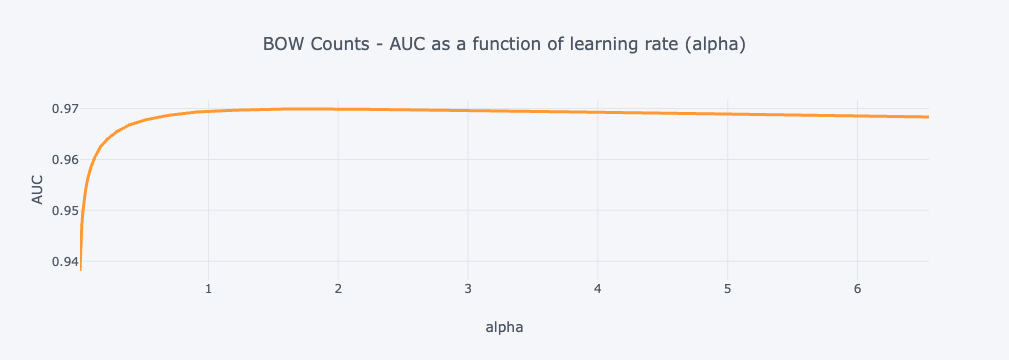

In [67]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [68]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

1.5998587196060574 0.9698858171170046


### Optimal Model

Let's use the optimal model regularization parameter and train a model on the **entire dataset**:

In [69]:
model = LogisticRegression(penalty='l2', C=opt_alpha, max_iter=10000)
model.fit(bow_counts, df.cls)

LogisticRegression(C=1.5998587196060574, max_iter=10000)

In [70]:
df['predicted_class'] = model.predict(bow_counts)
df[['class_0_prob','class_1_prob']] = model.predict_proba(bow_counts)
df['prediction_certainty'] = df.apply(lambda row: row.class_0_prob if row.predicted_class == 0 else row.class_1_prob, axis=1)

In [71]:
accuracy_score(df.predicted_class, df.cls)

0.9801768397033657

### Feature importance

In [72]:
weights = model.coef_.flatten()
words = [rev_dict[i] for i in range(len(weights))]
feature_weights = DataFrame({'word': words, 'weight': weights, 'absW': abs(weights)})
feature_weights.sort_values(by = 'absW', ascending = False, inplace = True)
feature_weights.head(5)

,word,weight,absW
1195,justinbieber,4.357349,4.357349
19,-,-4.246647,4.246647
2121,tmr15,3.552262,3.552262
1165,jasyla_,3.345459,3.345459
962,getglue,3.032820,3.032820


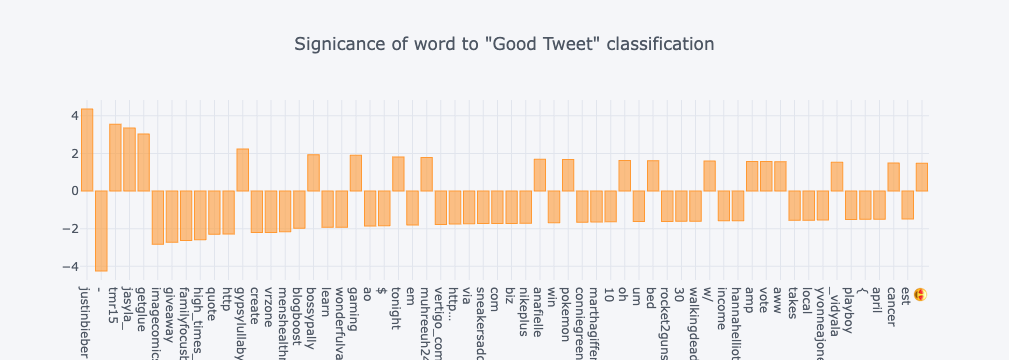

In [73]:
feature_weights.set_index('word').weight.head(60).iplot(kind = 'bar', title = 'Signicance of word to "Good Tweet" classification', hline=(0,0))


## Hand crafted features

In [74]:
def extract_featurs(tweet):
    return pd.Series({'has_at': '@' in tweet,
                      'has_url': 'http' in tweet,
                      'has_giveaway': 'giveaway' in tweet,
                      'has_blogboost': 'blog_boost' in tweet,
                      'has_dollar': '$' in tweet,
                      'has_hashtags': '#' in tweet })

In [75]:
features = df.original_lower_cased_tweet.apply(extract_featurs)
features.head()

,has_at,has_url,has_giveaway,has_blogboost,has_dollar,has_hashtags
0,True,False,False,False,False,False
1,True,True,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False


In [76]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, features, y = df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

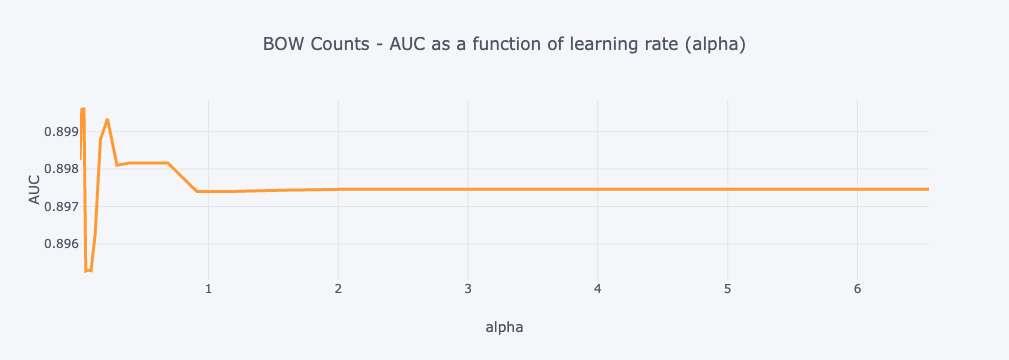

In [77]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [78]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

0.030888435964774818 0.8996080695220587


So we can see that very good results can be achieved by very few features.

## Using Words + additinal featurs

In [79]:
from scipy.sparse import coo_matrix, hstack

train_features_spares_matrix = coo_matrix(features)
train_united_features = hstack((clean_bow_counts ,train_features_spares_matrix))

In [80]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, train_united_features, y = df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

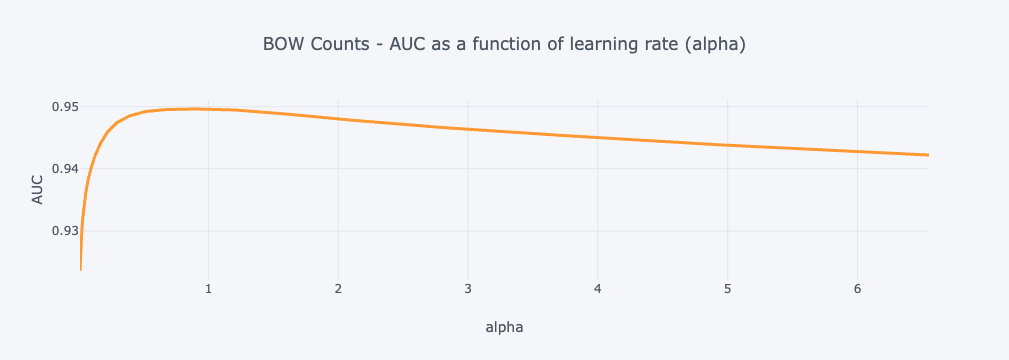

In [81]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [82]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

0.9102981779915218 0.9496188592439161


And we can see that by including the missing information we are getting some of the benfits of using the non-cleaned vocabulary